<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/SF_analysis_for_gbr_knn_mice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 2.1 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=8edef6f8c8a55d5245667b9403057ebe5a8f2af485107fd1e2e40d07592b5f47
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11331 sha256=6f07d4aa6438490ec344d90ff3a4857cc7c4a2390c938516674dc6a8fb9f324d
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from fancyimpute import IterativeImputer, IterativeSVD
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import ttest_ind

# Load the data
sf36_data = pd.read_csv('/content/sample_data/SF_36_DATA.csv')

In [10]:
# Load the original and imputed datasets
original_data = pd.read_csv('/content/sample_data/SF_36_DATA.csv')
knn_imputed_data = pd.read_csv('/content/sample_data/SF_36_DATA_KNN_Imputed.csv')
mice_imputed_data = pd.read_csv('/content/sample_data/SF_36_DATA_MICE_Imputed.csv')
gbr_imputed_data = pd.read_csv('/content/sample_data/SF_36_DATA_GBR_Imputed (1).csv')

In [11]:
# Compare Descriptive Statistics
def compare_statistics(original, imputed, method_name):
    print(f"Comparison of Descriptive Statistics for {method_name}:")
    print("Original Data Statistics:")
    print(original.describe())
    print("\nImputed Data Statistics:")
    print(imputed.describe())
    print("\n")

compare_statistics(original_data, knn_imputed_data, "KNN")
compare_statistics(original_data, mice_imputed_data, "MICE")
compare_statistics(original_data, gbr_imputed_data, "GBR")

Comparison of Descriptive Statistics for KNN:
Original Data Statistics:
            NEW_PID    RESPONSE  PHYSICAL_FUNCTIONING  PHYSICAL_LIMITATIONS  \
count  6.010000e+02  601.000000            253.000000            253.000000   
mean   5.574510e+07    4.494176             86.600791             79.841897   
std    3.551391e+07    2.295731             19.316360             32.485875   
min    5.034520e+05    1.000000              0.000000              0.000000   
25%    1.470146e+07    2.000000             85.000000             75.000000   
50%    7.990645e+07    4.000000             95.000000            100.000000   
75%    8.811144e+07    6.000000            100.000000            100.000000   
max    9.990144e+07    8.000000            100.000000            100.000000   

       EMOTIONAL_LIMITATIONS  ENERGY_FATIGUE  EMOTIONAL_WB  \
count             253.000000      253.000000    253.000000   
mean               80.764163       55.988142     78.324111   
std                32.917180  

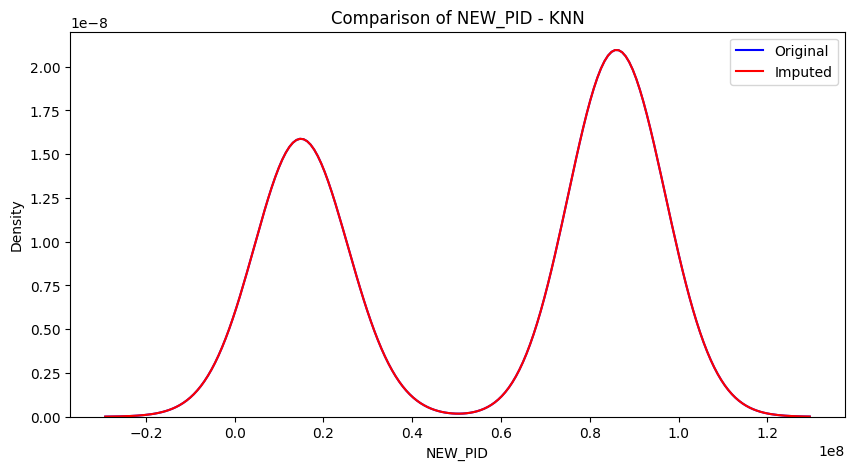

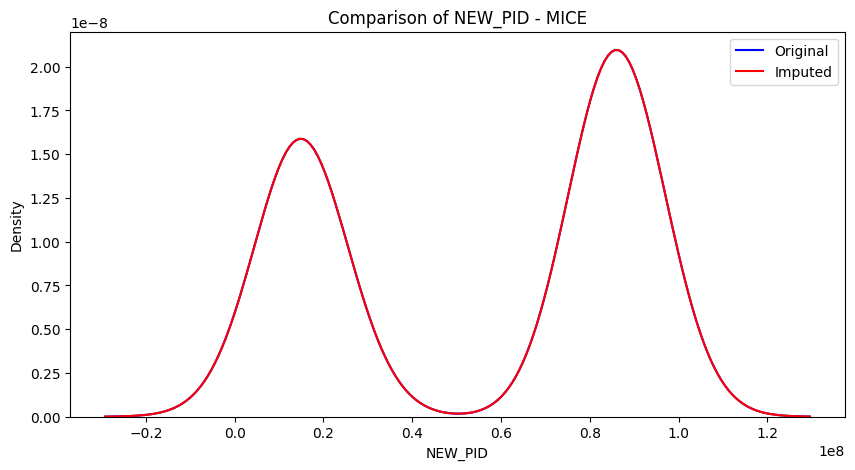

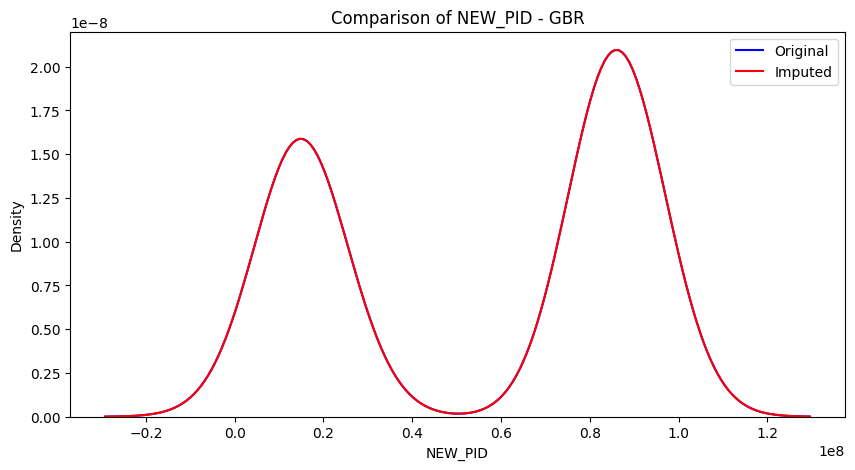

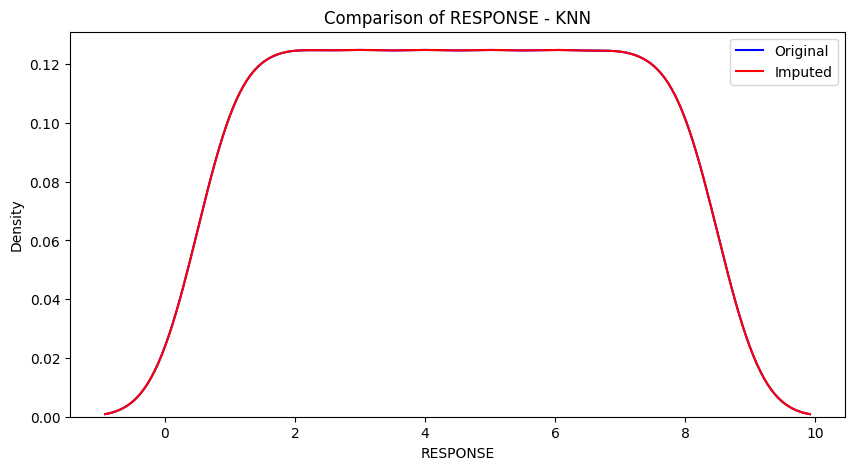

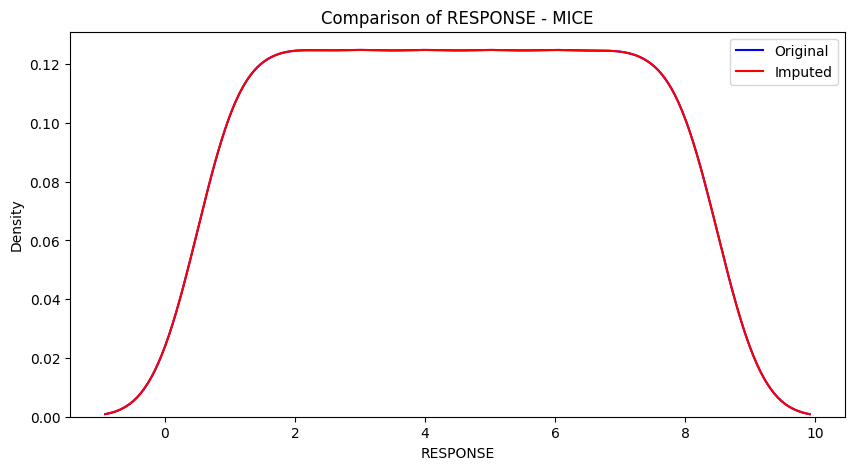

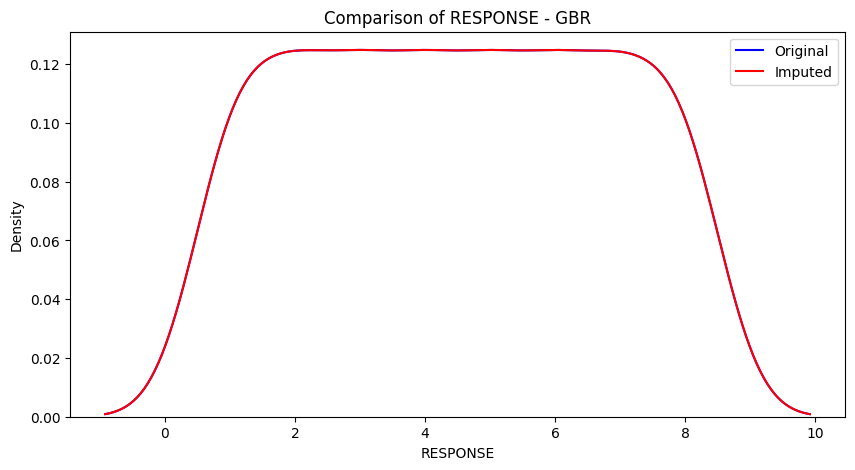

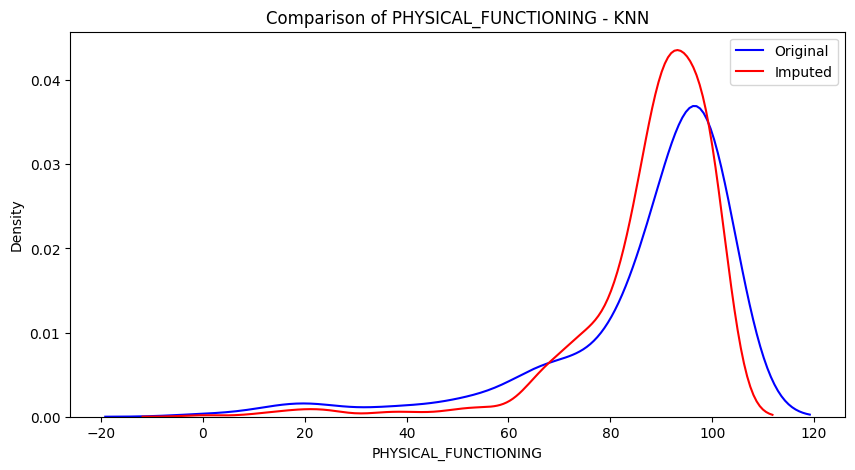

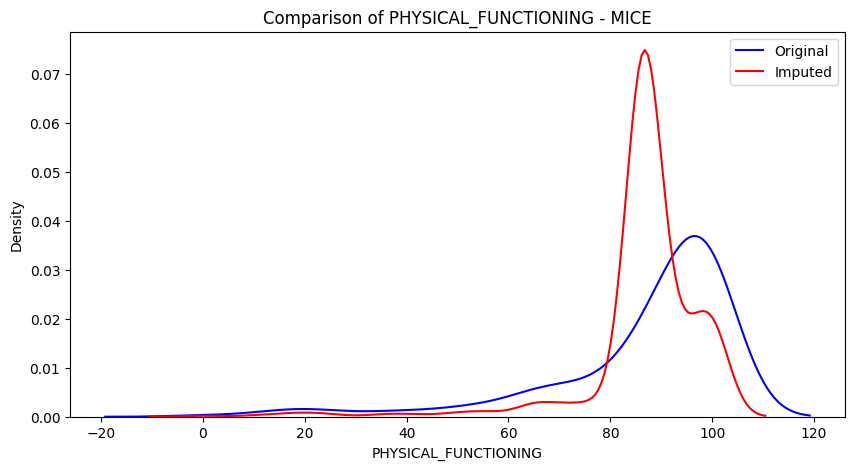

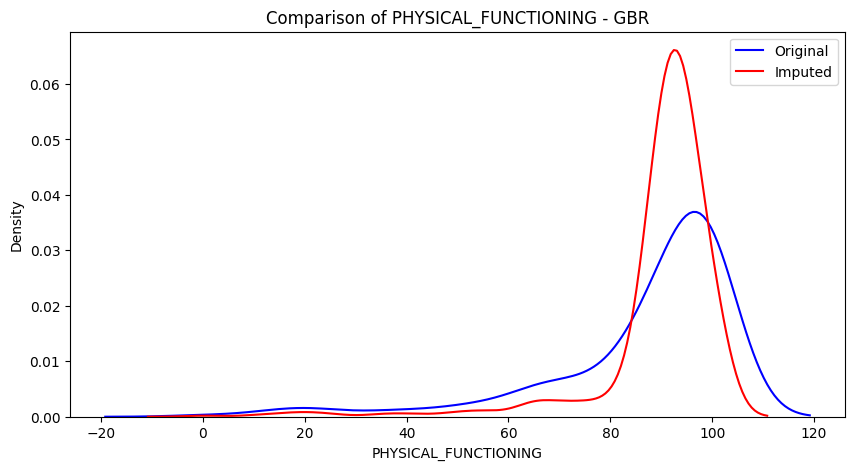

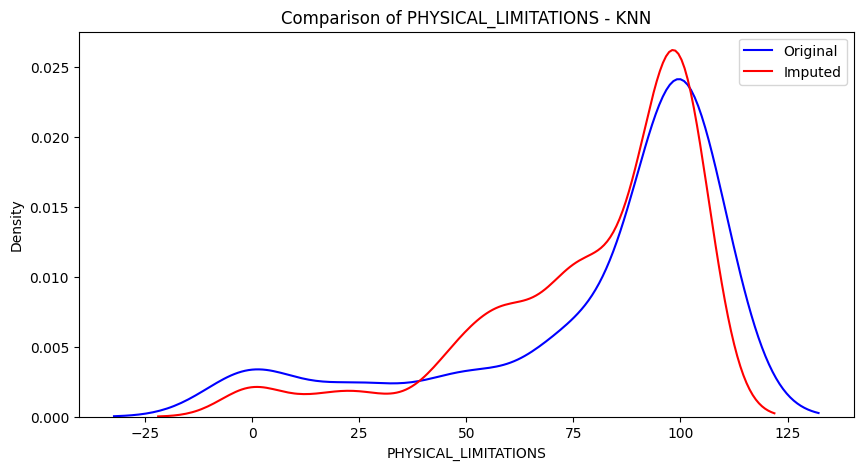

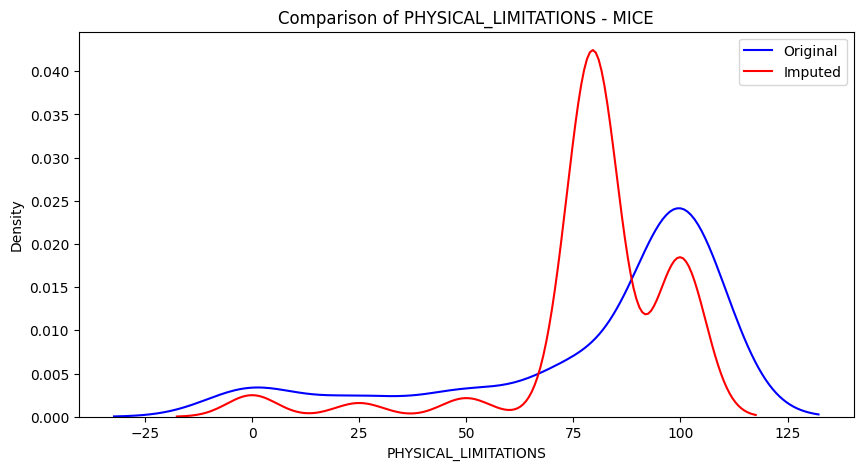

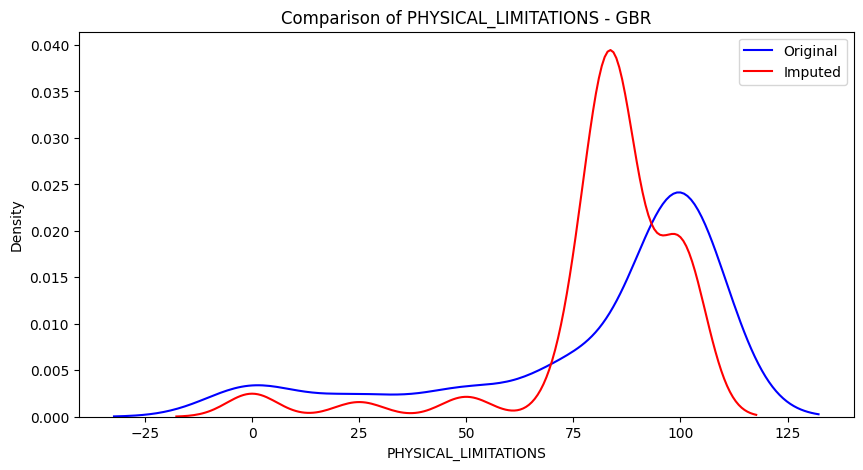

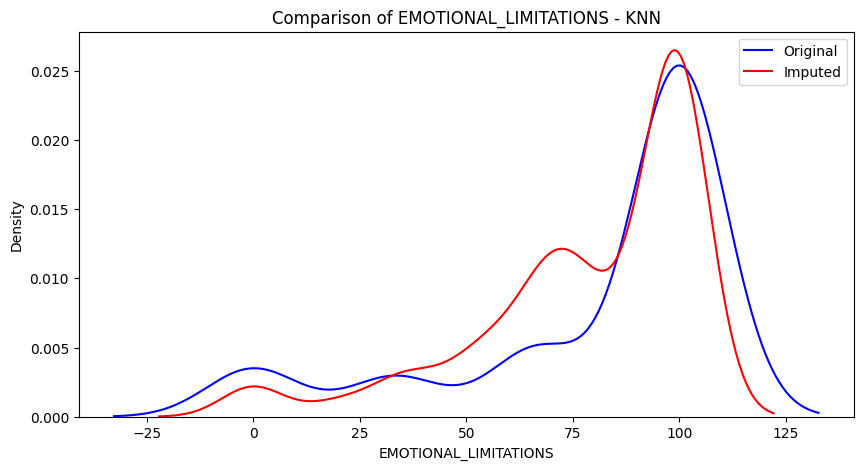

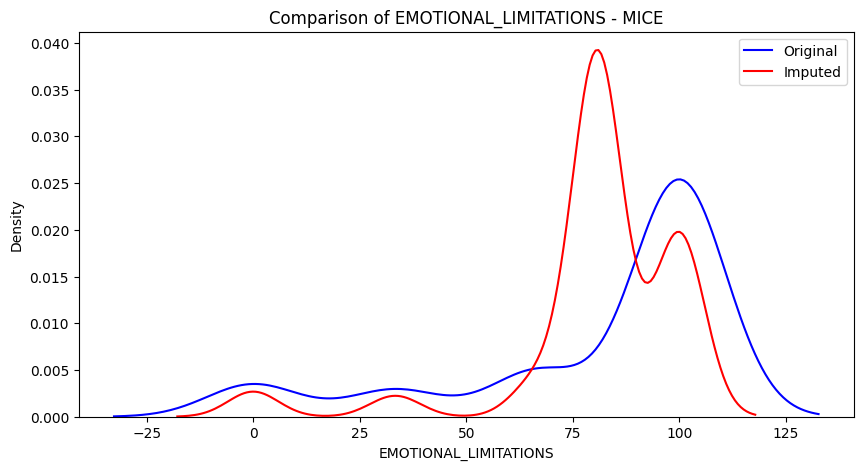

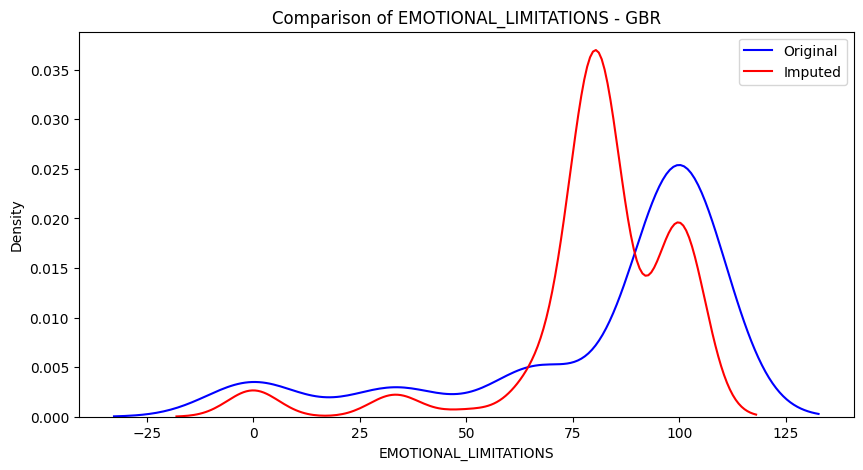

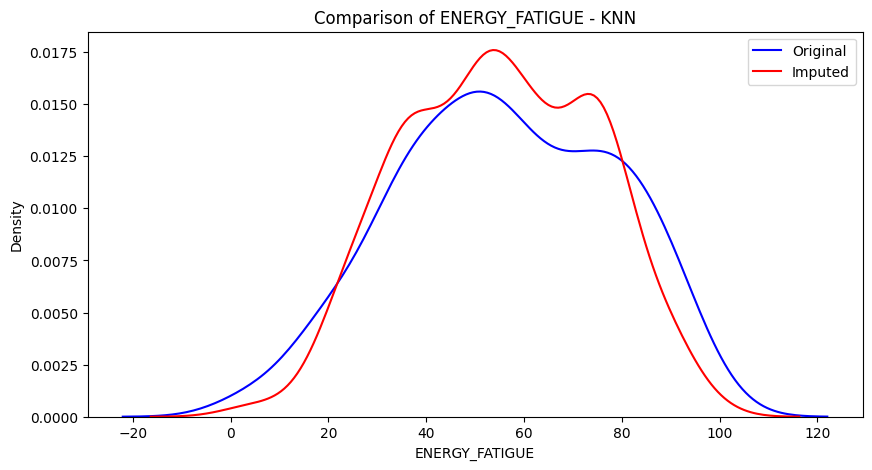

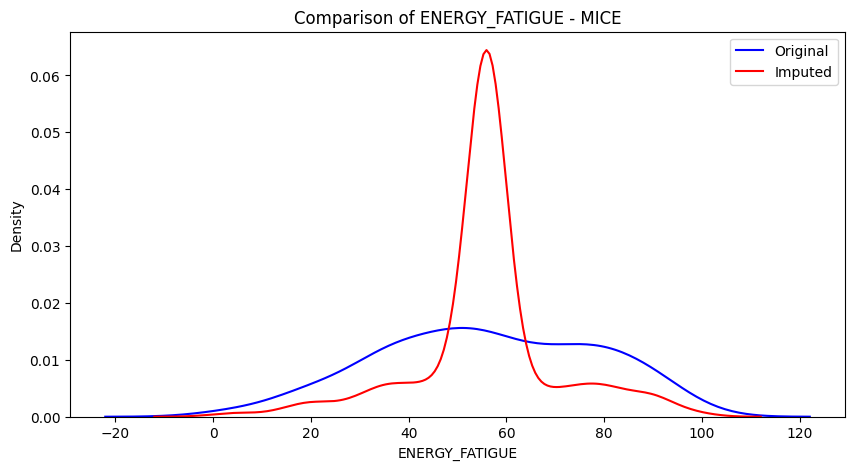

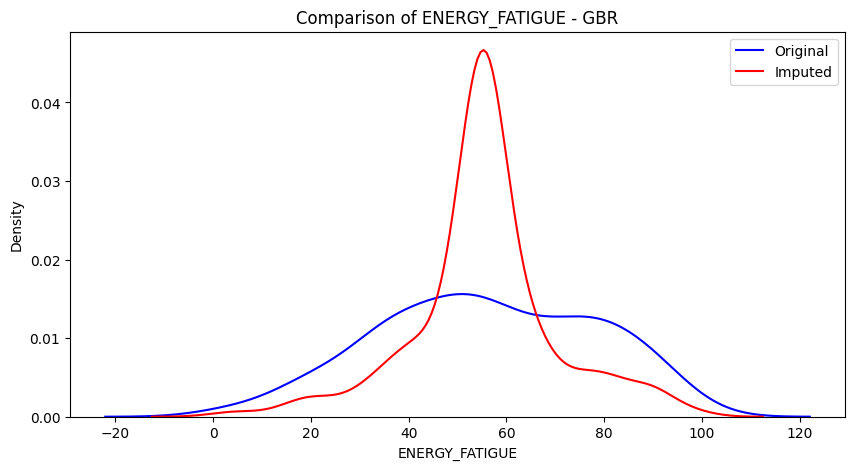

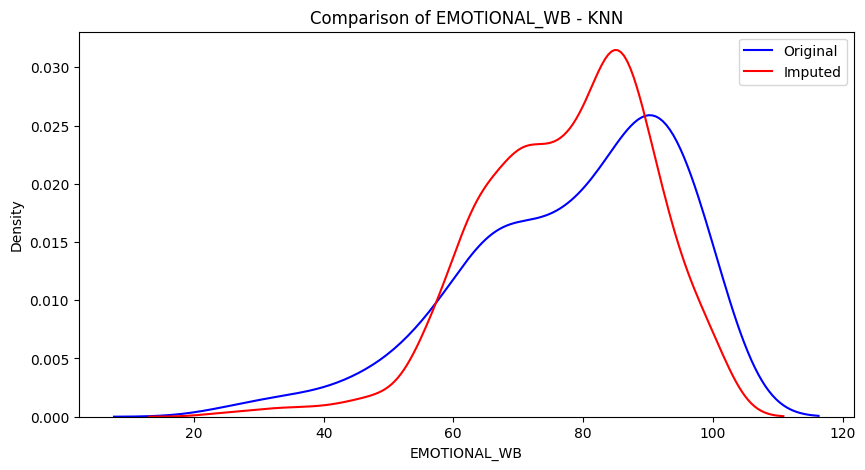

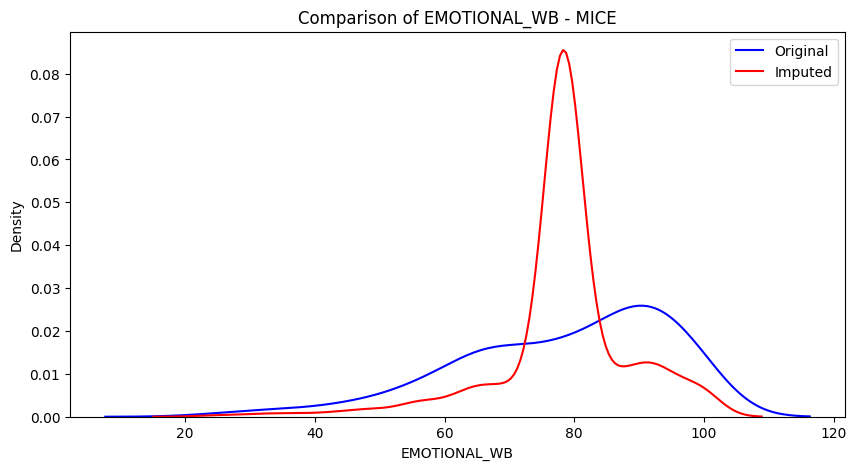

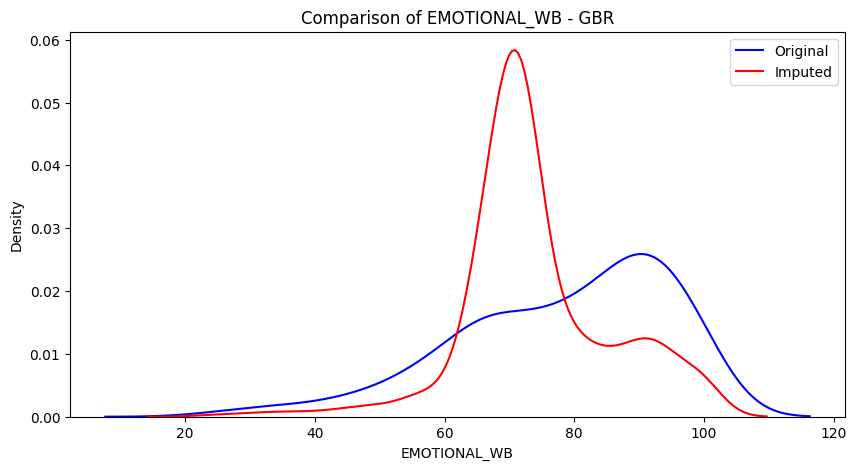

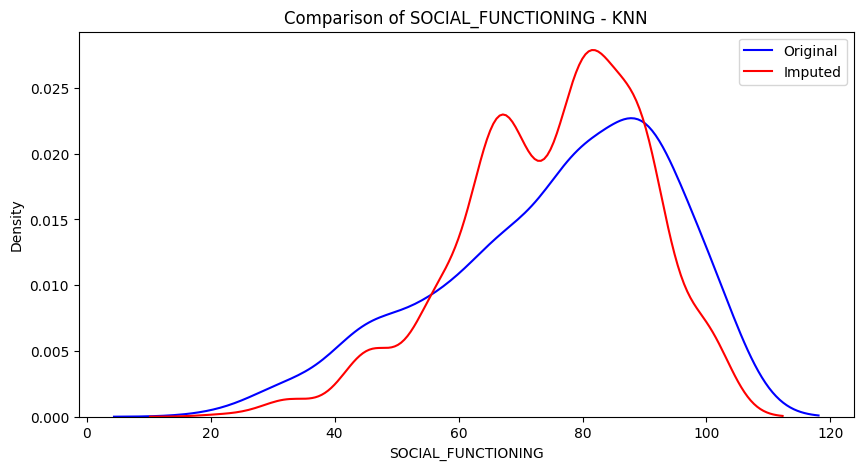

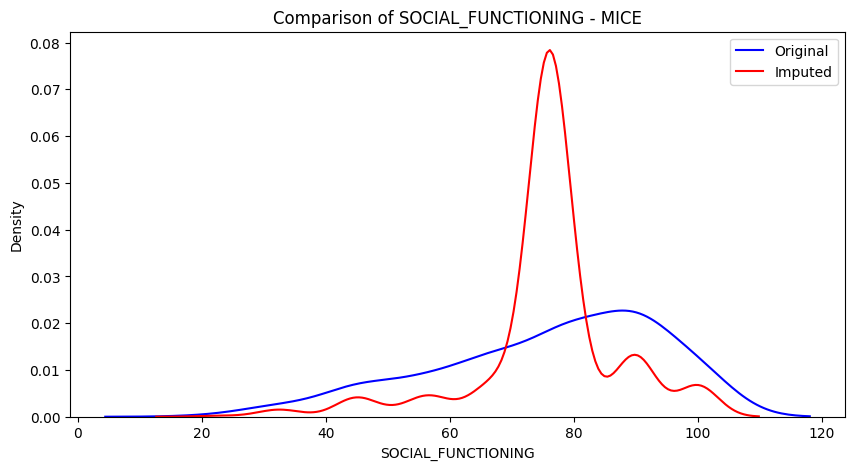

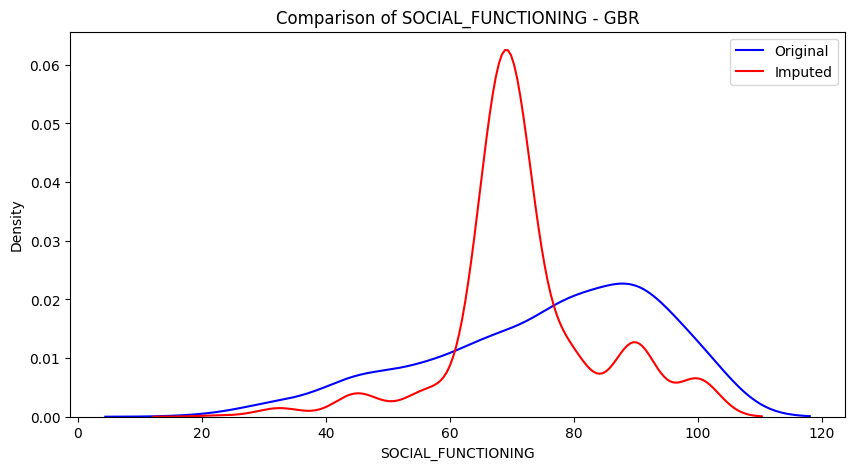

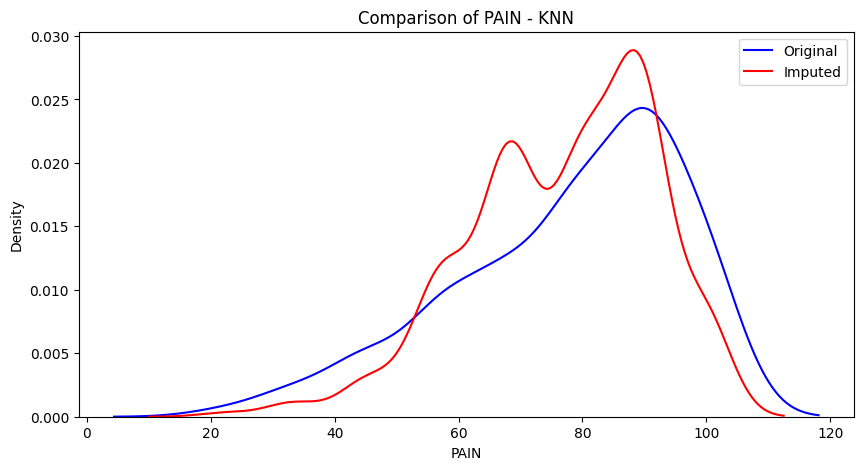

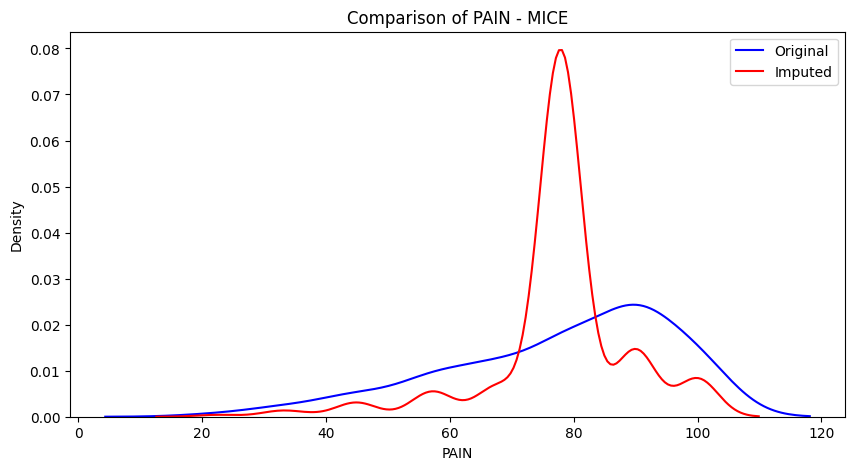

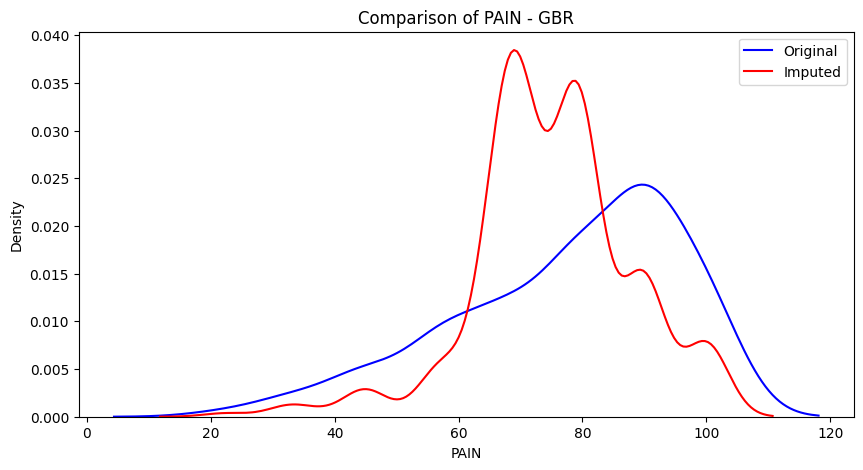

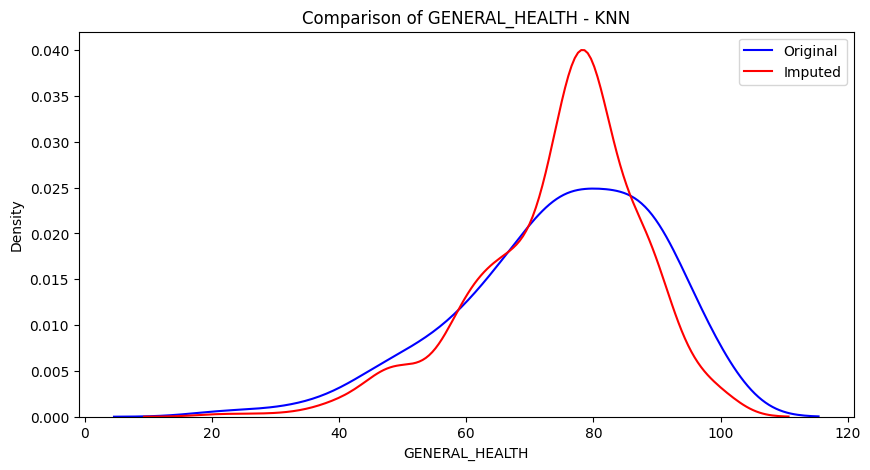

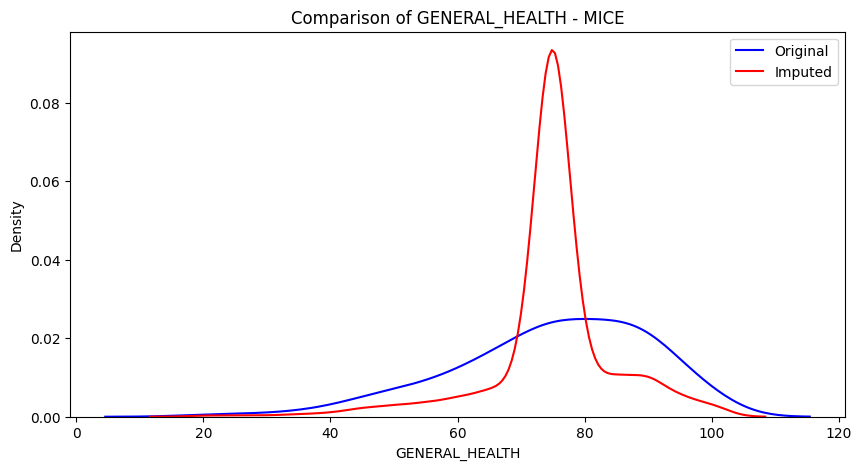

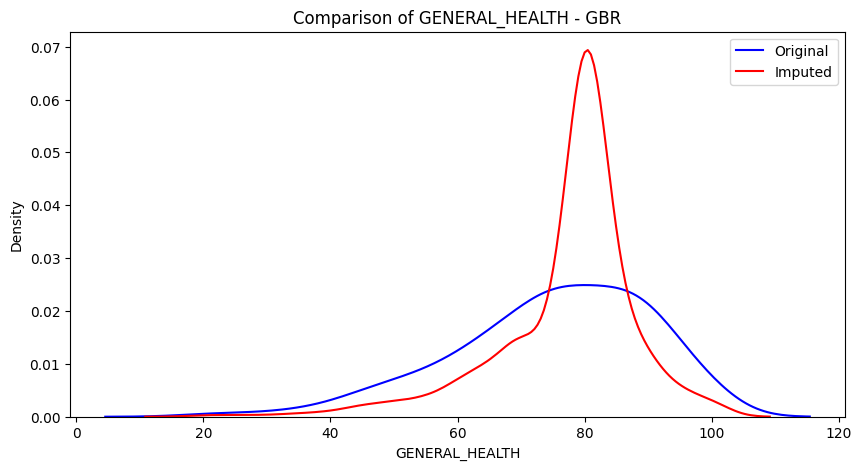

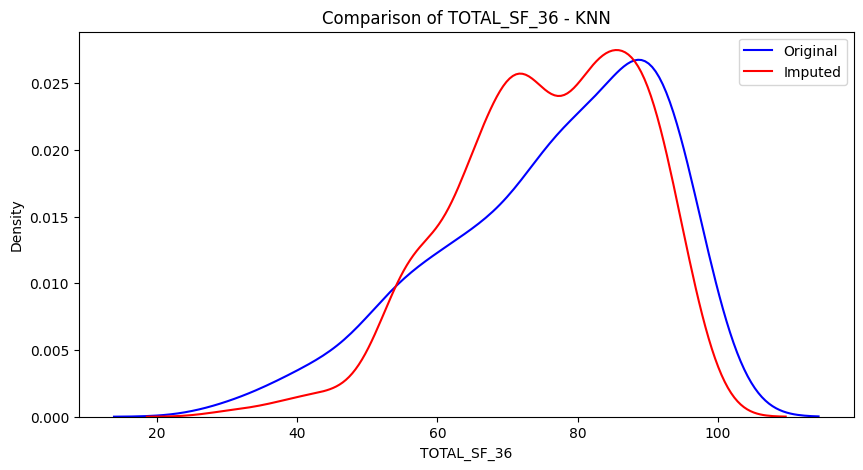

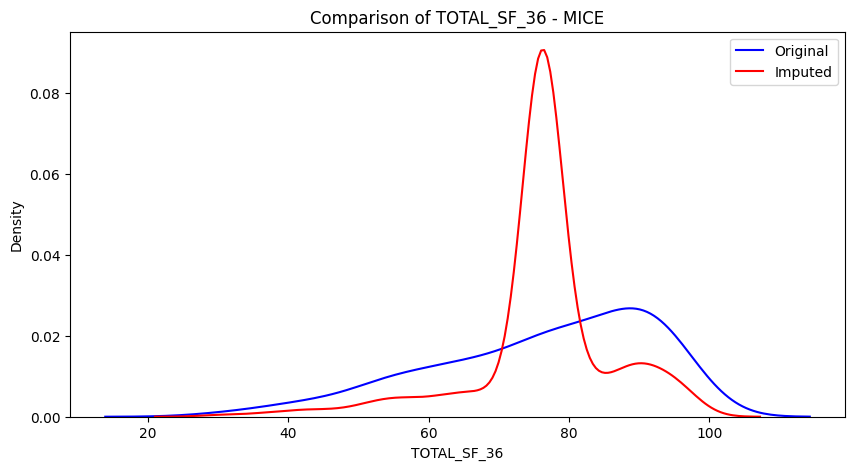

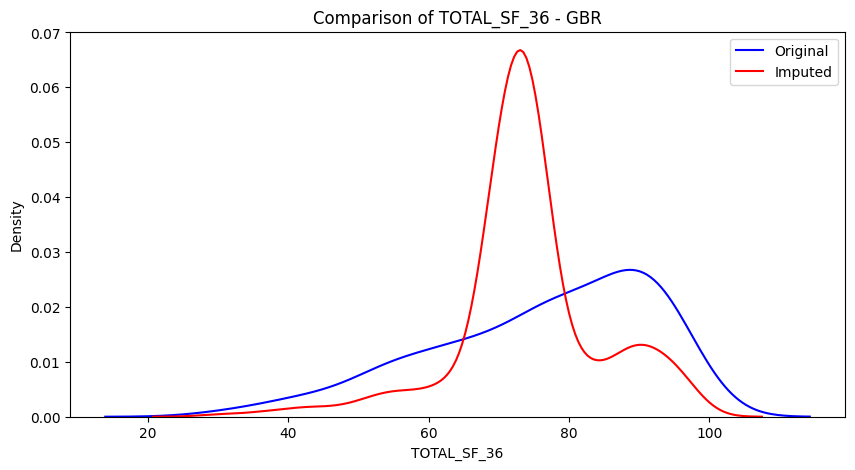

In [12]:
# Visual Comparison
def plot_comparison(original, imputed, column, method_name):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(original[column].dropna(), label='Original', color='blue')
    sns.kdeplot(imputed[column], label='Imputed', color='red')
    plt.title(f'Comparison of {column} - {method_name}')
    plt.legend()
    plt.show()

for column in original_data.columns:
    plot_comparison(original_data, knn_imputed_data, column, "KNN")
    plot_comparison(original_data, mice_imputed_data, column, "MICE")
    plot_comparison(original_data, gbr_imputed_data, column, "GBR")

In [13]:
# Perform T-tests
def t_test_comparison(original, imputed, column):
    original_data = original[column].dropna()
    imputed_data = imputed[column]
    t_stat, p_value = ttest_ind(original_data, imputed_data, equal_var=False)
    return t_stat, p_value

def compare_t_tests(original, imputed, method_name):
    print(f"T-test Comparison for {method_name}:")
    for column in original.columns:
        t_stat, p_value = t_test_comparison(original, imputed, column)
        print(f"Variable: {column}, T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

compare_t_tests(original_data, knn_imputed_data, "KNN")
compare_t_tests(original_data, mice_imputed_data, "MICE")
compare_t_tests(original_data, gbr_imputed_data, "GBR")

T-test Comparison for KNN:
Variable: NEW_PID, T-statistic: 0.0000, P-value: 1.0000
Variable: RESPONSE, T-statistic: 0.0000, P-value: 1.0000
Variable: PHYSICAL_FUNCTIONING, T-statistic: -0.8262, P-value: 0.4092
Variable: PHYSICAL_LIMITATIONS, T-statistic: 0.4509, P-value: 0.6523
Variable: EMOTIONAL_LIMITATIONS, T-statistic: 0.9025, P-value: 0.3673
Variable: ENERGY_FATIGUE, T-statistic: 0.6308, P-value: 0.5285
Variable: EMOTIONAL_WB, T-statistic: 0.8726, P-value: 0.3834
Variable: SOCIAL_FUNCTIONING, T-statistic: 0.4987, P-value: 0.6183
Variable: PAIN, T-statistic: 0.7145, P-value: 0.4753
Variable: GENERAL_HEALTH, T-statistic: 0.3400, P-value: 0.7341
Variable: TOTAL_SF_36, T-statistic: 0.6694, P-value: 0.5036
T-test Comparison for MICE:
Variable: NEW_PID, T-statistic: 0.0000, P-value: 1.0000
Variable: RESPONSE, T-statistic: 0.0000, P-value: 1.0000
Variable: PHYSICAL_FUNCTIONING, T-statistic: 0.0000, P-value: 1.0000
Variable: PHYSICAL_LIMITATIONS, T-statistic: 0.0000, P-value: 1.0000
Varia